<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/%D0%94_%D0%B712_Lite_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%2C_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора fashion_mnist, выполните следующие действия:

Создайте 9 моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке. Используйте следующее деление: обучающая выборка - 50000 примеров, проверочная выборка - 10000 примеров, тестовая выборка - 10000 примеров.

Создайте сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

**Шаблон ноутбука**

**Импорт библиотек**

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
from google.colab import files

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from keras.datasets import fashion_mnist

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

**Описание базы**

База: одежда, обувь и аксессуары
Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.

Изображения одного вида хранятся в numpy-массиве (28, 28) - x_train, x_test.
База содержит 10 классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - y_train, y_test.

Примеров: train - 60000, test - 10000.

**Вывод примеров**

In [ ]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle=True,test_size=0.16666)

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)
print('Размер x_val:',x_val.shape)
print('Размер y_val:',y_val.shape)

Размер x_train: (50000, 28, 28)
Размер y_train: (50000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)
Размер x_val: (10000, 28, 28)
Размер y_val: (10000,)


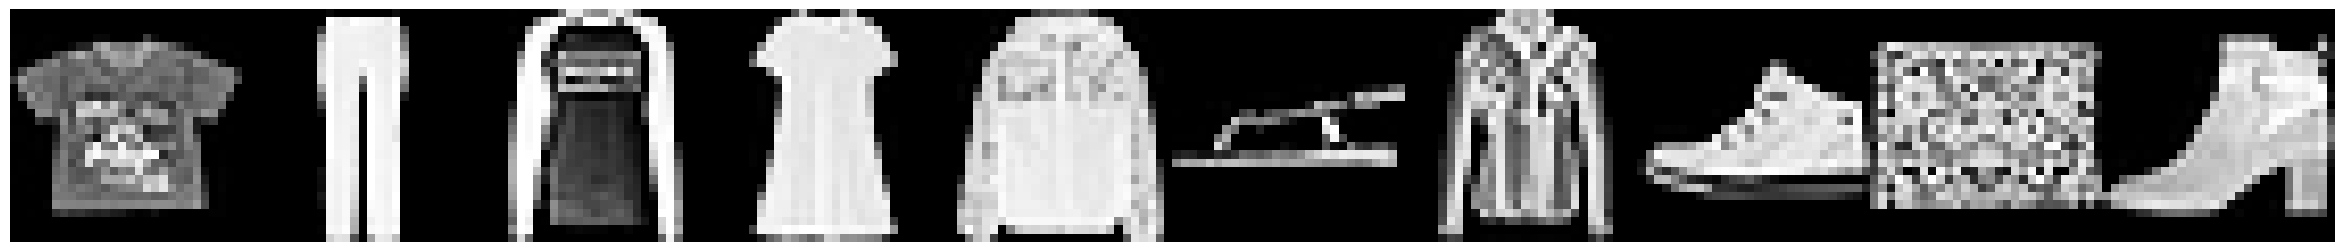

In [ ]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

**Решение:**

**Подготовка данных**

In [ ]:
# Изменение формы входных картинок с 28х28 на 784х1
print('Размерность ДО   ', x_train.shape)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)
print('Размерность ПОСЛЕ', x_train.shape)

# Нормализация, из диапазона 1-255 в 0-1
x_train= x_train/255.
x_test= x_test/255.
x_val= x_val/255.

# Преобразование данных в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

Размерность ДО    (50000, 28, 28)
Размерность ПОСЛЕ (50000, 784)


**Создание и обучение модели**

Составим списки гиперпараметров которые будем изменять в процессе обучения:

In [ ]:
dense_1 = [200, 400, 600] # кол-во нейронов во входном слое
drop_1  = [0.1, 0.2, 0.4] # доля отключаемых нейронов

parameters = []

In [ ]:
for i in dense_1:

    for k in drop_1:

      print('Параметры модели:', i, k)

      # Создание последовательной модели
      model = Sequential()

      model.add(Dense(i, input_dim=784, activation="relu")) # Добавление полносвязного слоя на 500 нейронов с relu-активацией
      model.add(Dense(100, activation="relu")) # Добавление полносвязного слоя на 200 нейронов с relu-активацией
      model.add(Dropout(k))
      model.add(Dense(10, activation="softmax")) # Добавление полносвязного слоя на 10 нейронов с softmax-активацией

      # Компиляция модели
      model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

      # Обучение модели
      model.fit(x_train, # обучающая выборка экземпляры класса
                y_train,  # обучающая выборка метки класса
                batch_size=128,  # размер батча
                epochs=10,  # количество эпох
                verbose=1, # 0 - не показывать ход обучения, 1 - показывать
                validation_data=(x_val, y_val)
                )

      ev_list = model.evaluate(x_test, y_test)
      print('Точность на тестовой выборке:', ev_list[1] )

      parameters.append(('Параметры модели:', i, k, ev_list[1]))


print(parameters)

Параметры модели: 200 0.1
Epoch 1/10
391/391 [==============================] - 5s 9ms/step - loss: 0.5718 - accuracy: 0.8014 - val_loss: 0.3974 - val_accuracy: 0.8604
Epoch 2/10
391/391 [==============================] - 4s 12ms/step - loss: 0.3922 - accuracy: 0.8568 - val_loss: 0.3838 - val_accuracy: 0.8609
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 0.3563 - accuracy: 0.8706 - val_loss: 0.3344 - val_accuracy: 0.8832
Epoch 4/10
391/391 [==============================] - 3s 9ms/step - loss: 0.3248 - accuracy: 0.8814 - val_loss: 0.3107 - val_accuracy: 0.8873
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 0.3064 - accuracy: 0.8887 - val_loss: 0.3237 - val_accuracy: 0.8836
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.2881 - accuracy: 0.8929 - val_loss: 0.3176 - val_accuracy: 0.8870
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 0.2749 - accuracy: 0.8993 - val_loss: 0.3156 

In [ ]:
for i in parameters:
  print(i)

('Параметры модели:', 200, 0.1, 0.8855000138282776)
('Параметры модели:', 200, 0.2, 0.883400022983551)
('Параметры модели:', 200, 0.4, 0.8772000074386597)
('Параметры модели:', 400, 0.1, 0.8799999952316284)
('Параметры модели:', 400, 0.2, 0.8849999904632568)
('Параметры модели:', 400, 0.4, 0.8828999996185303)
('Параметры модели:', 600, 0.1, 0.8896999955177307)
('Параметры модели:', 600, 0.2, 0.8820000290870667)
('Параметры модели:', 600, 0.4, 0.8797000050544739)


Эксперименты показали, что при количестве нейронов 600 во входном слое и отключении 20% нейронов точность при данной архитектуре достигает ~ 0.888



**Тестирование модели**

In [ ]:
# Предсказание тестовой выборки
prediction = model.predict(x_test)

# Предсказание на материале случайного изображения из базы
n = np.random.randint(0, 100)
print('Предсказание ', np.argmax(prediction[n]))
print('Правильный ответ', np.argmax(y_test[n]))

313/313 [==============================] - 1s 3ms/step
Предсказание  4
Правильный ответ 4
